# Getting Started

In [2]:
# !pip install ipyparallel

In [3]:
# !pip install pycaret

In [46]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', 45)
pd.set_option('display.max_rows', 45)

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from pycaret.regression import setup, compare_models
from sklearn.model_selection import KFold, cross_val_score

from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#import optuna

import os
import ipyparallel as ipp

In [5]:
# cluster = ipp.Cluster(n=4)
# with cluster as rc:
#     ar = rc[:].apply_async(os.getpid)
#     pid_map = ar.get_dict()

In [6]:
train0 = pd.read_csv('data/train.csv')
test0 = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [7]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,...,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,...,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,...,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,...,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,...,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,...,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,...,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,...,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,...,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,...,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


# Combine Train and Test Sets

In [10]:
target = train0['SalePrice']
test_ids = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis = 1)
test1 = test0.drop('Id', axis = 1)

data1 = pd.concat([train1, test1], axis = 0).reset_index(drop=True) 
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,...,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,...,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,...,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,...,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,...,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,...,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,...,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Cleaning

In [12]:
data2 = data1.copy()

In [13]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

## Ensure Proper Data Types

## Fill Categorical Missing Values

In [14]:
# Impute using a constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")
    
# Impute using the column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'    
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [15]:
data3 = data2.copy()

## Numeric Missing Values

In [16]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [17]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3 = knn_impute(data3, column)

In [18]:
data4 = data3.copy()

# Feature Engineering

In [19]:
data4["SqFtPerRoom"] =  data4["GrLivArea"] / (data4["TotRmsAbvGrd"] + 
                                                 data4["FullBath"] + 
                                                 data4["HalfBath"] + 
                                                 data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + 0.5 * data4['HalfBath'] + 
                               data4['BsmtFullBath'] + 0.5 * data4['BsmtHalfBath'])

data4['HighQualSF'] = data4['1stFlrSF'] + data4['2ndFlrSF']

In [20]:
data5 = data4.copy()

# Feature Transformations

## Log Transform for Skewed Features

In [21]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute_Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute_Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [22]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])

In [23]:
skew_df.query

,Feature,Skew,Absolute_Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


# Cosine Transform for Cyclical Features

In [24]:
data4['MoSold'] = (-np.cos(0.5236*data5['MoSold']))

In [25]:
data6 = data5.copy()

# Encode Categoricals

In [26]:
data6 = pd.get_dummies(data6)

In [27]:
data7 = data6.copy()

# Scaling

In [28]:
scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)

In [29]:
data7

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,0.017291,-0.777287,1.196876,-0.116932,0.564627,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,1.016638,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,0.347150,0.424865,-0.863610,-0.116932,-0.370371,-0.835139,3.888856,0.781366,-0.764608,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,0.078551,-0.554028,1.201129,-0.116932,0.698477,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,-0.088244,-0.419015,1.159720,-0.116932,0.577201,1.135609,-0.251544,-1.027363,-0.764608,0.169927,-0.200513,0.447166,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,0.264464,0.123520,1.260739,-0.116932,1.337430,1.135609,-0.251544,0.781366,1.265077,1.385655,-0.200513,1.526048,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.943755,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,0.321166,0.330167,-0.863610,-0.116932,-0.464456,1.135609,-0.251544,-1.027363,-0.764608,1.

In [30]:
data8 = data7.copy()

# Target Transformation

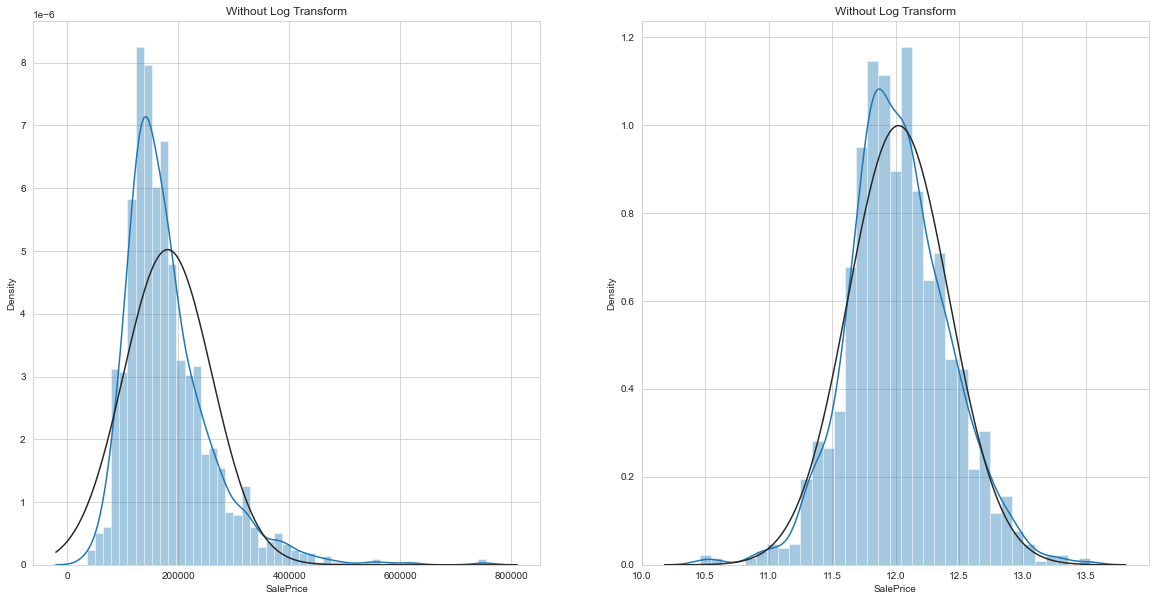

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title('Without Log Transform')

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title('Without Log Transform')

plt.show()




In [35]:
log_target = np.log(target)

In [36]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Split data

In [39]:
train_final = data8.loc[:train0.index.max(), :].copy()
test_final = data8.loc[train0.index.max() + 1 :, :].copy()

In [40]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,0.017291,-0.777287,1.196876,-0.116932,0.564627,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,1.016638,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,0.347150,0.424865,-0.863610,-0.116932,-0.370371,-0.835139,3.888856,0.781366,-0.764608,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,0.078551,-0.554028,1.201129,-0.116932,0.698477,1.135609,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,-0.088244,-0.419015,1.159720,-0.116932,0.577201,1.135609,-0.251544,-1.027363,-0.764608,0.169927,-0.200513,0.447166,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,0.264464,0.123520,1.260739,-0.116932,1.337430,1.135609,-0.251544,0.781366,1.265077,1.385655,-0.200513,1.526048,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,0.108495,-0.444901,1.133640,-0.116932,0.449086,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,0.447166,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,0.517469,1.962367,-0.863610,-0.116932,1.157188,1.135609,-0.251544,0.781366,-0.764608,0.169927,-0.200513,0.447166,...,-0.064249,-2.027827,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,0.269644,0.237703,1.288139,-0.116932,1.530152,-0.835139,-0.251544,0.781366,-0.764608,1.385655,-0.200513,1

In [41]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,0.042712,-0.635877,-0.863610,-0.116932,-1.424253,-0.835139,-0.251544,-1.027363,-0.764608,-1.045801,-0.200513,-0.943755,...,-0.064249,-2.027827,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,0.391116,0.585094,-0.863610,-0.116932,-0.211177,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,24.141251,-5.176872,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,0.085908,-0.527218,1.136698,-0.116932,0.415262,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,-2.027827,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,0.084075,-0.533898,1.126531,-0.116932,0.367659,-0.835139,-0.251544,0.781366,1.265077,0.169927,-0.200513,0.447166,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,0.359187,0.468732,-0.863610,-0.116932,-0.326788,-0.835139,-0.251544,0.781366,-0.764608,-1.045801,-0.200513,-0.943755,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.943755,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,-0.364608,-2.169094,1.060554,-0.116932,-0.815601,-0.835139,-0.251544,-1.027363,1.265077,0.169927,-0.200513,-0.198448,...,-0.064249,0.493139,-0.041423,0.193167,-0.037043,-0.183413,-0.018512,-0.175272,-0.064249,-0.041423,-0.094801,-0.055613,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,0.321166,0.330167,-0.863610,-0.116932,-0.464456,1.135609

# Model Selection

In [47]:
_ = setup(data=pd.concat([train_final, log_target], axis = 1), target = 'SalePrice', fold_shuffle=True)

,Description,Value
0,session_id,4412
1,Target,SalePrice
2,Original Data,"(1460, 322)"
3,Missing Values,False
4,Numeric Features,44
5,Categorical Features,277
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 301)"


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [48]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0801,0.0151,0.1207,0.8985,0.0094,0.0067,2.4450
br,Bayesian Ridge,0.0817,0.0152,0.1208,0.8960,0.0093,0.0068,0.0180
ridge,Ridge Regression,0.0848,0.0166,0.1263,0.8859,0.0098,0.0071,0.0170
huber,Huber Regressor,0.0883,0.0175,0.1306,0.8802,0.0101,0.0074,0.0820
lightgbm,Light Gradient Boosting Machine,0.0935,0.0191,0.1369,0.8696,0.0106,0.0078,0.1120
gbr,Gradient Boosting Regressor,0.0901,0.0195,0.1375,0.8667,0.0106,0.0075,0.0940
omp,Orthogonal Matching Pursuit,0.0909,0.0198,0.1369,0.8641,0.0106,0.0076,0.0170
et,Extra Trees Regressor,0.0993,0.0218,0.1458,0.8519,0.0113,0.0083,0.2170
rf,Random Forest Regressor,0.1005,0.0224,0.1484,0.8455,0.0115,0.0084,0.1890
xgboost,Extreme Gradient Boosting,0.1009,0.0229,0.1491,0.8447,0.0116,0.0084,0.1560


# Hyperparameter Optimization

In [49]:
# def br_objective(trial):
#     n_iter = trial.suggest_int('n_iter', 50, 600)
#     tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
#     alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
#     alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
#     lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
#     lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)

#     model = BayesianRidge(
#         n_iter=n_iter,
#         tol=tol,
#         alpha_1=alpha_1,
#         alpha_2=alpha_2,
#         lambda_1=lambda_1,
#         lambda_2=lambda_2
#     )

#     model.fit(train_final, log_target)

#     cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))

#     return np.mean(cv_scores)

In [50]:
# study = optuna.create_study(direction='minimize')
# study.optimize(br_objective, n_trials=100)

In [51]:
# study.best_params

# Bagging Ensemble

In [52]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [53]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "ridge": Ridge(**ridge_params),
    "omp": OrthogonalMatchingPursuit()
}

In [54]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.


# Evaluate

In [58]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [59]:
result

array([1.13163194, 1.10136166, 1.12704954, 1.18074775, 1.16256399,
       1.17119603, 1.12960897, 1.12360152, 1.1832052 , 1.15073542])

In [60]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.122416565605037
0.019653099866795948
----------
br
1.1351015144106285
0.02565664199126965
----------
lightgbm
1.1323401113019387
0.022377581009135113
----------
ridge
1.134531953387114
0.0248986133474205
----------
omp
1.146170202554281
0.02617531962028976
